In [1]:
rm(list=ls())
setwd("/pool0/data/tushark/pysumma/")
library(circlize)

circlize version 0.4.3
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.



In [2]:
chord_plot <- function(fname, remove_diag=TRUE) {
    df <- read.csv(fname)
    dm <- data.matrix(df)[,-1]
    if (remove_diag) {
        diag(dm) <- NA
    }
    return(chorddiag(dm, groupnamePadding=20, showTicks=FALSE, showGroupnames=FALSE))
}

data_chord <- function(mat, remove_diag=TRUE) {
    mat <- data.matrix(mat)
    varnames <- c('Evaporation', 'Precipitation', 'SWE', 'Soil Liquid', 'Runoff')
    colors <- c('#3472c6', '#83a83b', '#c44e52', '#8172b2', '#ff914d')
    return(chorddiag(mat, groupColors=colors, groupnamePadding=20, showTicks=FALSE))
}

data_diff <- function(f1, f2, remove_diag=TRUE) { 
    df1 <- read.csv(f1)
    dm1 <- data.matrix(df1)[,-1]
    df2 <- read.csv(f2)
    dm2 <- data.matrix(df2)[,-1]
    if (remove_diag) {
        diag(dm1) <- NA
        diag(dm2) <- NA
    }
    varnames <- c('Precipitation', 'Temperature', 'Soil Moisture', 'Latent Heat', 'Sensible Heat', 'Shortwave')
    diff <- dm1 - dm2
    diff_pos <- diff
    diff_pos[diff_pos < 0] <- NA
    rownames(diff_pos) <- varnames
    colnames(diff_pos) <- varnames
    diff_neg <- -1 * diff
    diff_neg[diff_neg < 0] <- NA
    rownames(diff_neg) <- varnames
    colnames(diff_neg) <- varnames
    return(list(diff_pos, diff_neg))
}

get_matrix <- function(fname, remove_diag=TRUE) {
    df <- read.csv(fname)
    dm <- data.matrix(df)[,-1]
    varnames <- c('Precipitation', 'Temperature', 'Soil Moisture', 'Latent Heat', 'Sensible Heat', 'Shortwave')
    rownames(dm) <- varnames
    colnames(dm) <- varnames
    if (remove_diag) {
        diag(dm) <- NA
    }
    return(dm)
}

In [3]:
fnames <- list.files(path="./data", pattern="*.csv")

In [4]:
fnames[18]

[1] "ElSaler_output_difTrans_exponential_Jarvis.csv"

Look at differences in ElSaler diffTrans_exponential_Jarvis (high rmse, high MI_distance) vs Elsaler diffTrans_exponential_BallBerry (lowest rmse, lowest mi_distance. For ElSaler, Ballberry decision led to significantly less rmse and mi_dist, opposed to Jarvis)

Notice that the Ballberry option has a chord diagram very similar to the observations, and it has a much lower rmse and mutual information distance. 

In [5]:
ElSaler_d_e_b <- get_matrix('./data/ElSaler_output_difTrans_exponential_BallBerry.csv', 
                            remove_diag=TRUE)
ElSaler_d_e_b

,Precipitation,Temperature,Soil Moisture,Latent Heat,Sensible Heat,Shortwave
Precipitation,NA,0,0,0.00000000,0.0000000,0.00000000
Temperature,0,NA,0,0.00000000,0.0000000,0.00000000
Soil Moisture,0,0,NA,0.11424703,0.3933387,0.10784759
Latent Heat,0,0,0,NA,0.2486881,0.08790657
Sensible Heat,0,0,0,0.17846337,NA,1.14066753
Shortwave,0,0,0,0.09004328,0.9403506,NA


In [6]:
grid.col = c("Precipitation" = "red", Temperature = "green", Soil_Moisture = "blue",
    Latent_Heat = "grey", Sensible_Heat = "grey", Shortwave = "grey")

Note: 13 points are out of plotting region in sector 'Soil Moisture', track '1'.

Note: 11 points are out of plotting region in sector 'Latent Heat', track '1'.

Note: 13 points are out of plotting region in sector 'Sensible Heat', track '1'.

Note: 9 points are out of plotting region in sector 'Shortwave', track '1'.



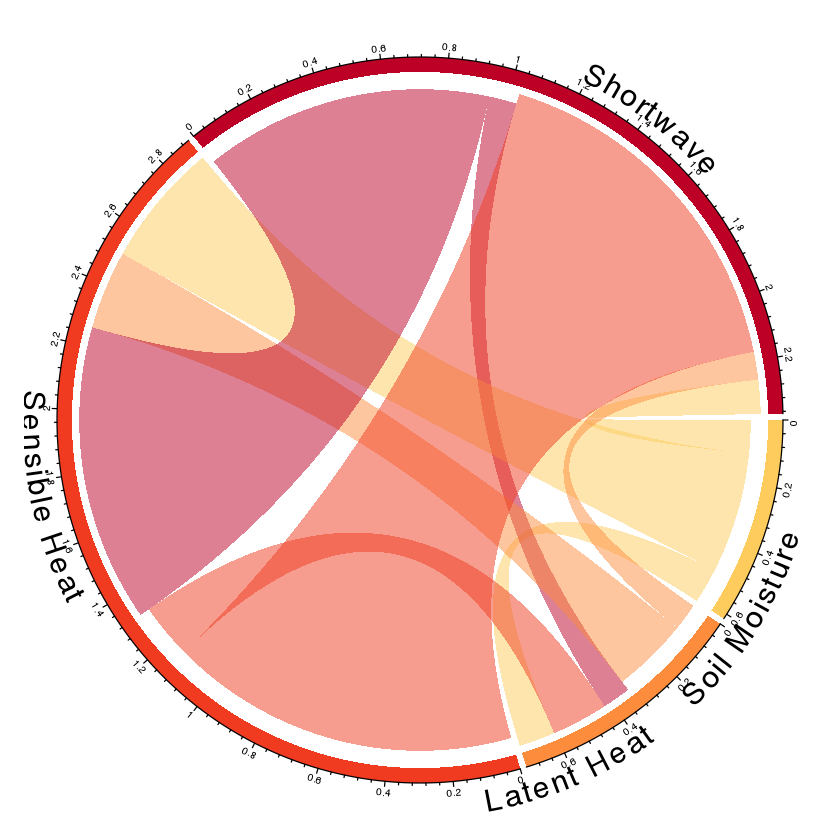

In [25]:
colors <- c('#dd1c77', '#ffffb2', '#fecc5c', '#fd8d3c', '#f03b20', '#bd0026')
chordDiagram(ElSaler_d_e_b, directional=1, annotationTrack=c('grid','axis'), 
             grid.col = colors)
#for (si in get.all.sector.index()) {
#    xlim = get.cell.meta.data("xlim", sector.index = si, track.index = 1)
#    ylim = get.cell.meta.data("ylim", sector.index = si, track.index = 1)
#    circos.text(mean(xlim), mean(ylim), si, cex=1.4)
#}
circos.track(track.index = 1, panel.fun = function(x, y) {
   circos.text(CELL_META$xcenter, CELL_META$ylim[1], CELL_META$sector.index,
       facing = "bending.inside", niceFacing = TRUE, cex=1.5, adj = c(0, -1.2))
}, bg.border = NA) # here set bg.border to NA is important

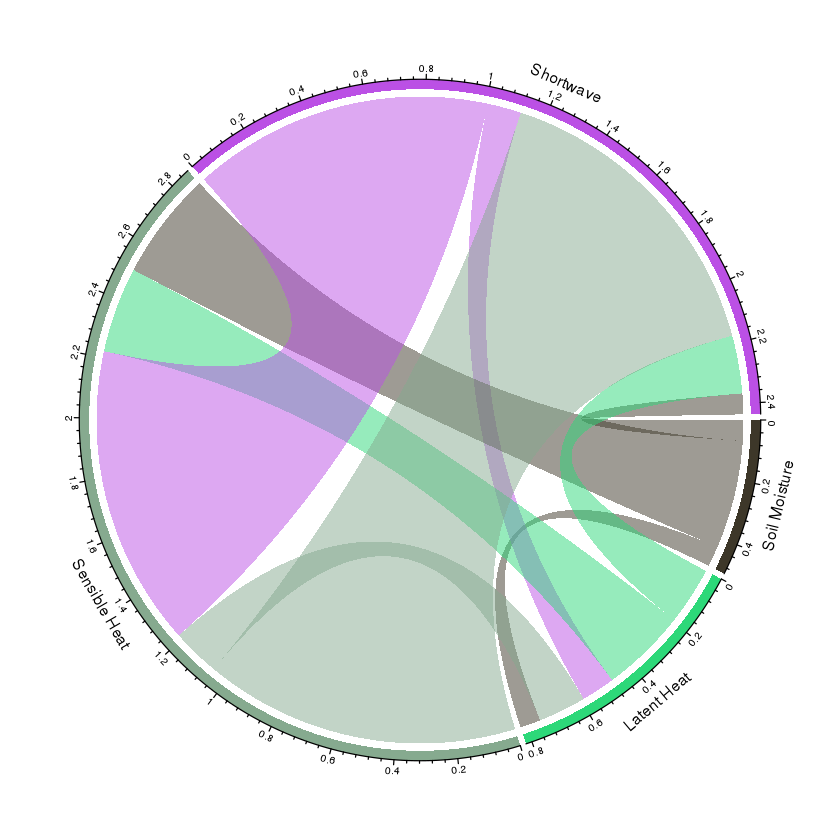

In [44]:
ElSaler_d_e_j <- get_matrix('./data/ElSaler_output_difTrans_exponential_Jarvis.csv', remove_diag=TRUE) 
chordDiagram(ElSaler_d_e_j)

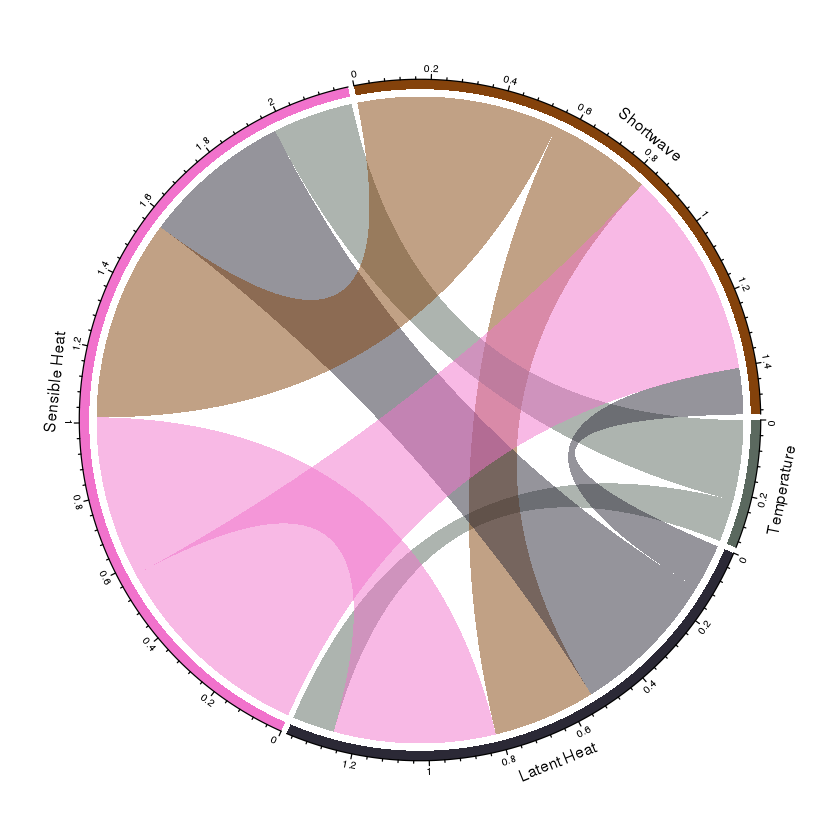

In [7]:
ElSaler_obs <- get_matrix('/pool0/data/andrbenn/PLUMBER_data/data/ElSaler_obs_0_10.csv', remove_diag=TRUE) 
chordDiagram(ElSaler_obs)

We do a similar analysis at Blodgett, where Jarvis vs Ballberry also makes a difference. Look at differences in Blodgett simpleExp_exponential_Jarvis (high rmse, high MI_distance) vs simpleExp_exponential_BallBerry (lowest rmse, lowest mi_distance. 

interesting how the lowest and highest seems tobe based on one decision, everything else the same.

Notice that the Ballberry option has a chord diagram very similar to the observations, and it has a much lower rmse and mutual information distance.


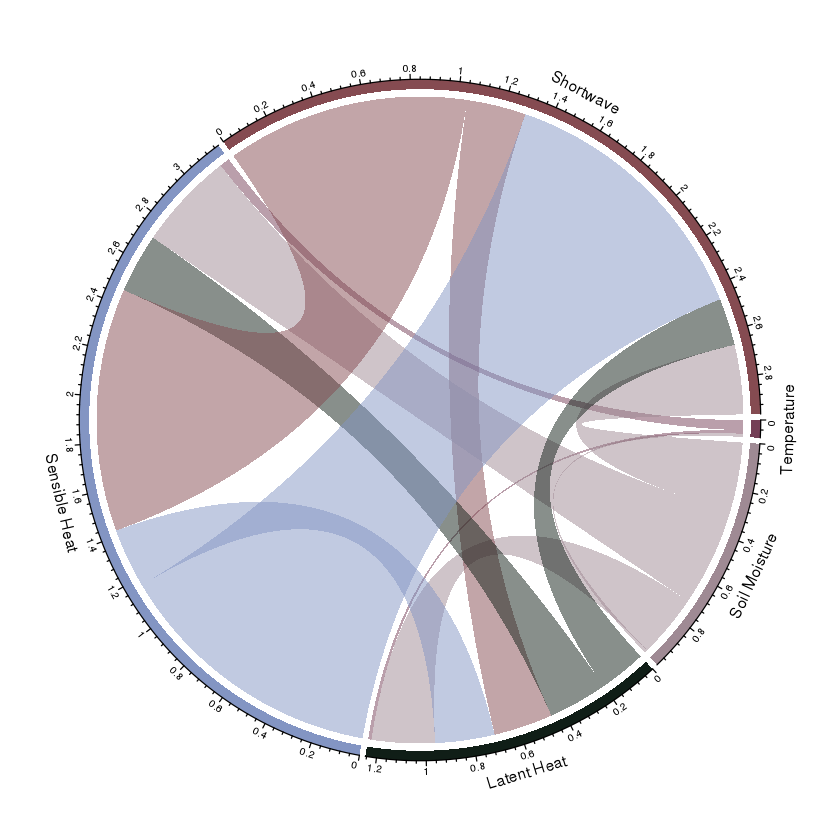

In [8]:
Blodgett_s_e_b <- get_matrix('./data/Blodgett_output_simplExp_exponential_BallBerry.csv', remove_diag=TRUE) 
chordDiagram(Blodgett_s_e_b)

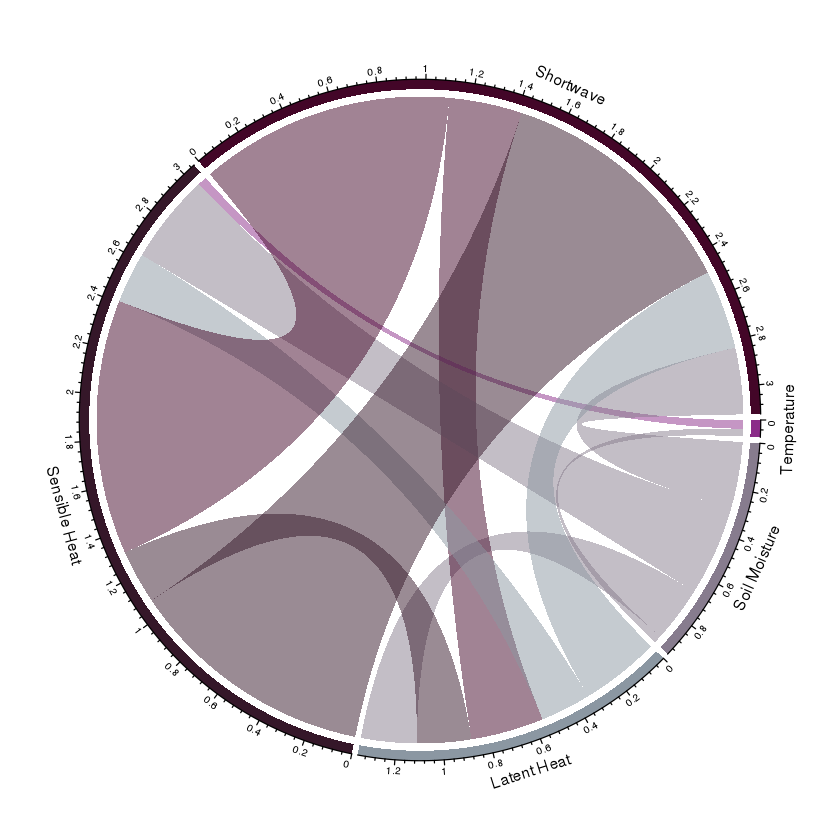

In [9]:
Blodgett_s_e_j <- get_matrix('./data/Blodgett_output_simplExp_exponential_Jarvis.csv', remove_diag=TRUE) 
chordDiagram(Blodgett_s_e_j)

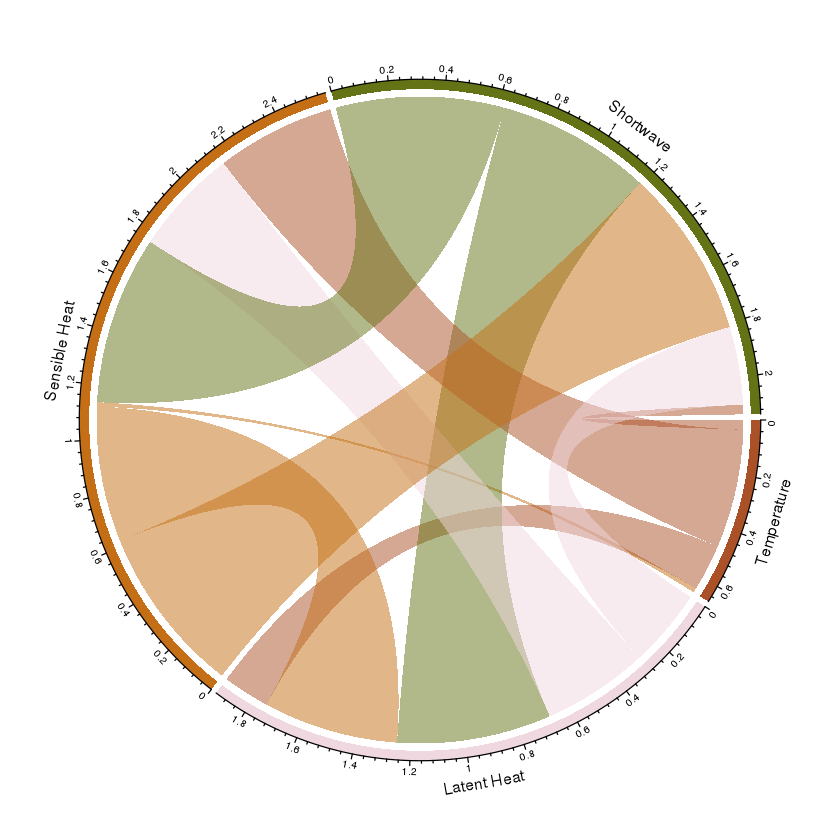

In [10]:
Blodgett_obs <- get_matrix('/pool0/data/andrbenn/PLUMBER_data/data/Blodgett_obs_0_10.csv', remove_diag=TRUE) 
chordDiagram(Blodgett_obs)

Look at differences in Loobos diffTrans_exponential_Jarvis (high rmse, high MI_distance) diffTrans_exponential_BallBerry (lowest rmse, lowest mi_distance). For Loobos, Ballberry decision led to significantly less rmse and mi_dist, opposed to Jarvis)

Notice that the Ballberry option has a chord diagram very similar to the observations, and it has a much lower rmse and mutual information distance.

Also look at SimpleExp_exponential_Ballberry, which has similar rmse as the first plot, but much higher mi distance


Note: 11 points are out of plotting region in sector 'Temperature', track '1'.

Note: 13 points are out of plotting region in sector 'Soil Moisture', track '1'.

Note: 11 points are out of plotting region in sector 'Latent Heat', track '1'.

Note: 13 points are out of plotting region in sector 'Sensible Heat', track '1'.

Note: 9 points are out of plotting region in sector 'Shortwave', track '1'.



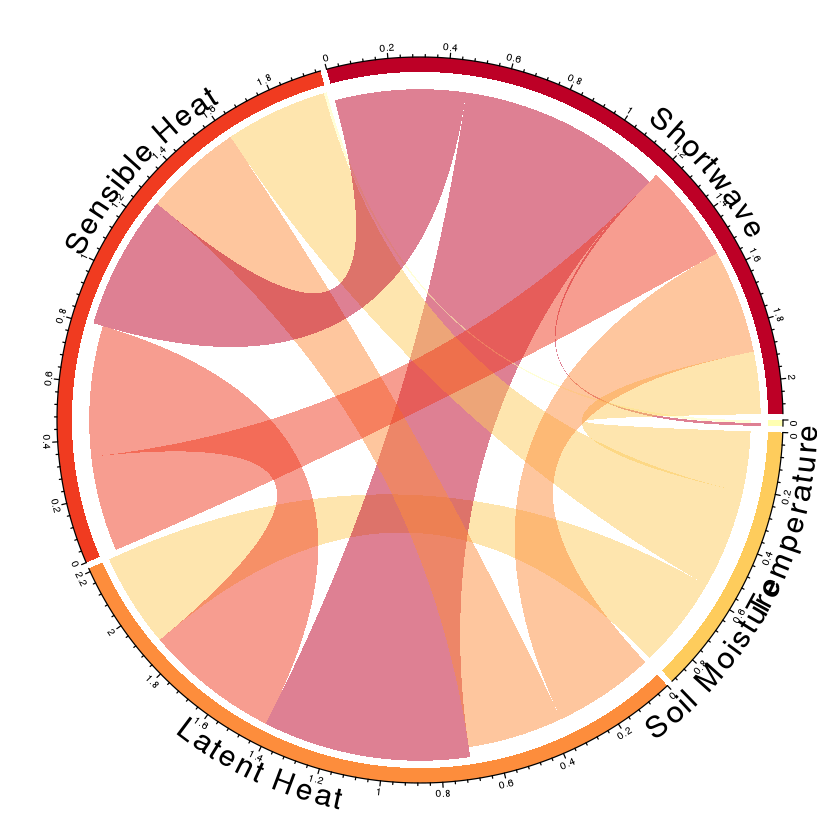

In [26]:
#fed976
#feb24c
#fd8d3c
#fc4e2a
#e31a1c
#b10026
#colors <- c('#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#b10026')
Amplero_s_l_b <- get_matrix('./data/Amplero_output_simplExp_logBelowCanopy_BallBerry.csv', remove_diag=TRUE) 
chordDiagram(Amplero_s_l_b, directional=1, annotationTrack=c('grid','axis'), grid.col = colors)
#for (si in get.all.sector.index()) {
#    xlim = get.cell.meta.data("xlim", sector.index = si, track.index = 1)
#    ylim = get.cell.meta.data("ylim", sector.index = si, track.index = 1)
#    circos.text(mean(xlim), mean(ylim), si, cex=1.4)
#}
circos.track(track.index = 1, panel.fun = function(x, y) {
   circos.text(CELL_META$xcenter, CELL_META$ylim[1], CELL_META$sector.index,
       facing = "bending.inside", niceFacing = TRUE, cex=1.5, adj = c(0, -1.2))
}, bg.border = NA) # here set bg.border to NA is important

Note: 11 points are out of plotting region in sector 'Temperature', track '1'.

Note: 13 points are out of plotting region in sector 'Soil Moisture', track '1'.

Note: 11 points are out of plotting region in sector 'Latent Heat', track '1'.

Note: 13 points are out of plotting region in sector 'Sensible Heat', track '1'.

Note: 9 points are out of plotting region in sector 'Shortwave', track '1'.



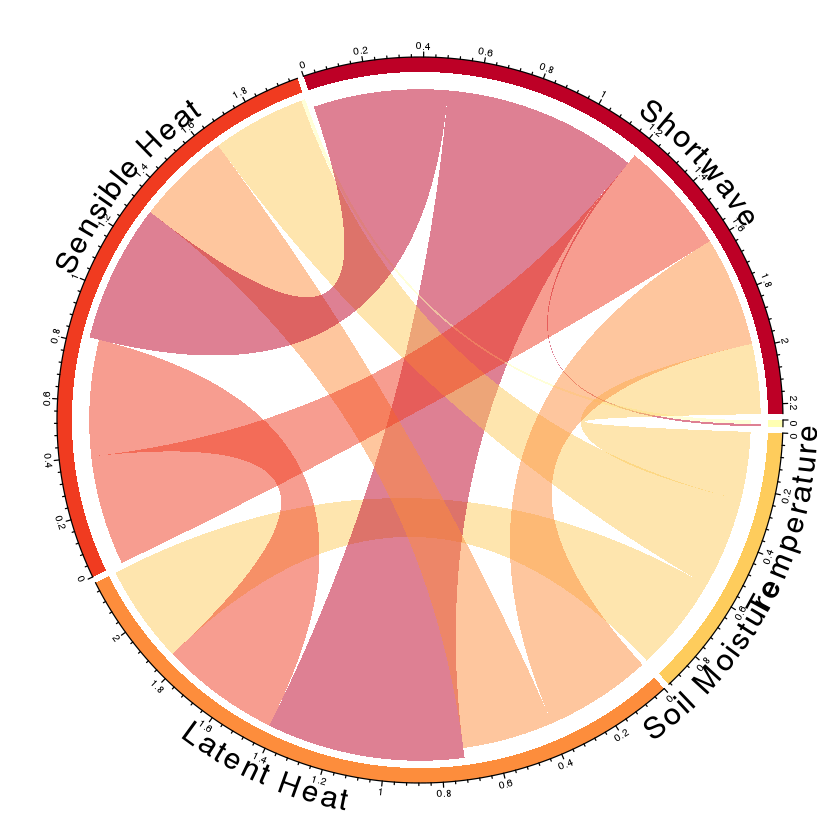

In [27]:
Amplero_d_l_b <- get_matrix('./data/Amplero_output_difTrans_logBelowCanopy_BallBerry.csv', remove_diag=TRUE) 
chordDiagram(Amplero_d_l_b, directional=1, annotationTrack=c('grid','axis'), grid.col = colors)
#for (si in get.all.sector.index()) {
#    xlim = get.cell.meta.data("xlim", sector.index = si, track.index = 1)
#    ylim = get.cell.meta.data("ylim", sector.index = si, track.index = 1)
#    circos.text(mean(xlim), mean(ylim), si, cex=1.4)
#}
circos.track(track.index = 1, panel.fun = function(x, y) {
   circos.text(CELL_META$xcenter, CELL_META$ylim[1], CELL_META$sector.index,
       facing = "bending.inside", niceFacing = TRUE, cex=1.5, adj = c(0, -1.2))
}, bg.border = NA) # here set bg.border to NA is important

In [31]:
Loobos_d_e_j


,Precipitation,Temperature,Soil Moisture,Latent Heat,Sensible Heat,Shortwave
Precipitation,NA,0,0,0.0000000,0.0000000,0.0000000
Temperature,0,NA,0,0.0000000,0.0000000,0.0000000
Soil Moisture,0,0,NA,0.1652222,0.3005210,0.1770775
Latent Heat,0,0,0,NA,0.2590152,0.4178319
Sensible Heat,0,0,0,0.2088423,NA,0.2871709
Shortwave,0,0,0,0.3142033,0.3251019,NA


Note: 11 points are out of plotting region in sector 'Temperature', track '1'.

Note: 11 points are out of plotting region in sector 'Latent Heat', track '1'.

Note: 13 points are out of plotting region in sector 'Sensible Heat', track '1'.

Note: 9 points are out of plotting region in sector 'Shortwave', track '1'.



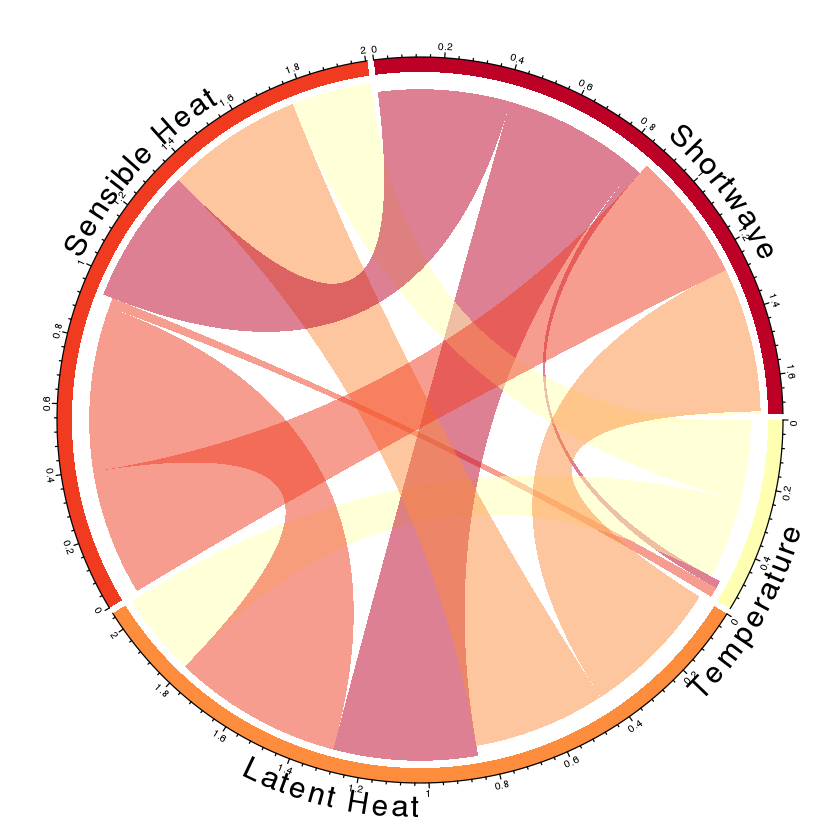

In [11]:
Amplero_obs <- get_matrix('/pool0/data/andrbenn/PLUMBER_data/data/Amplero_obs_0_10.csv', remove_diag=TRUE) 
chordDiagram(Amplero_obs, directional=1, annotationTrack=c('grid','axis'), grid.col = colors)
#for (si in get.all.sector.index()) {
#    xlim = get.cell.meta.data("xlim", sector.index = si, track.index = 1)
#    ylim = get.cell.meta.data("ylim", sector.index = si, track.index = 1)
#    circos.text(mean(xlim), mean(ylim), si, cex=1.4)
#}
circos.track(track.index = 1, panel.fun = function(x, y) {
   circos.text(CELL_META$xcenter, CELL_META$ylim[1], CELL_META$sector.index,
       facing = "bending.inside", niceFacing = TRUE, cex=1.5, adj = c(0, -1.2))
}, bg.border = NA) # here set bg.border to NA is important

In [32]:
Loobos_obs

,Precipitation,Temperature,Soil Moisture,Latent Heat,Sensible Heat,Shortwave
Precipitation,NA,0,0,0.00000000,0.0000000,0.0000000
Temperature,0,NA,0,0.09046137,0.1383082,0.0000000
Soil Moisture,0,0,NA,0.00000000,0.0000000,0.0000000
Latent Heat,0,0,0,NA,0.4326531,0.2707077
Sensible Heat,0,0,0,0.43106844,NA,0.2939610
Shortwave,0,0,0,0.36318079,0.4590086,NA


difference between low rmse, low mi_diff and observaiton

In [19]:
Amplero_diffs <- data_diff('/pool0/data/andrbenn/PLUMBER_data/data/Amplero_obs_0_10.csv', 
                          './data/Amplero_output_simplExp_logBelowCanopy_BallBerry.csv', remove_diag=TRUE)
colors2 = colors <- c('#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e')#ccebc5
#a8ddb5
#7bccc4
#4eb3d3
#2b8cbe
#08589e

Note: 11 points are out of plotting region in sector 'Temperature', track '1'.

Note: 13 points are out of plotting region in sector 'Soil Moisture', track '1'.

Note: 11 points are out of plotting region in sector 'Latent Heat', track '1'.

Note: 13 points are out of plotting region in sector 'Sensible Heat', track '1'.

Note: 9 points are out of plotting region in sector 'Shortwave', track '1'.



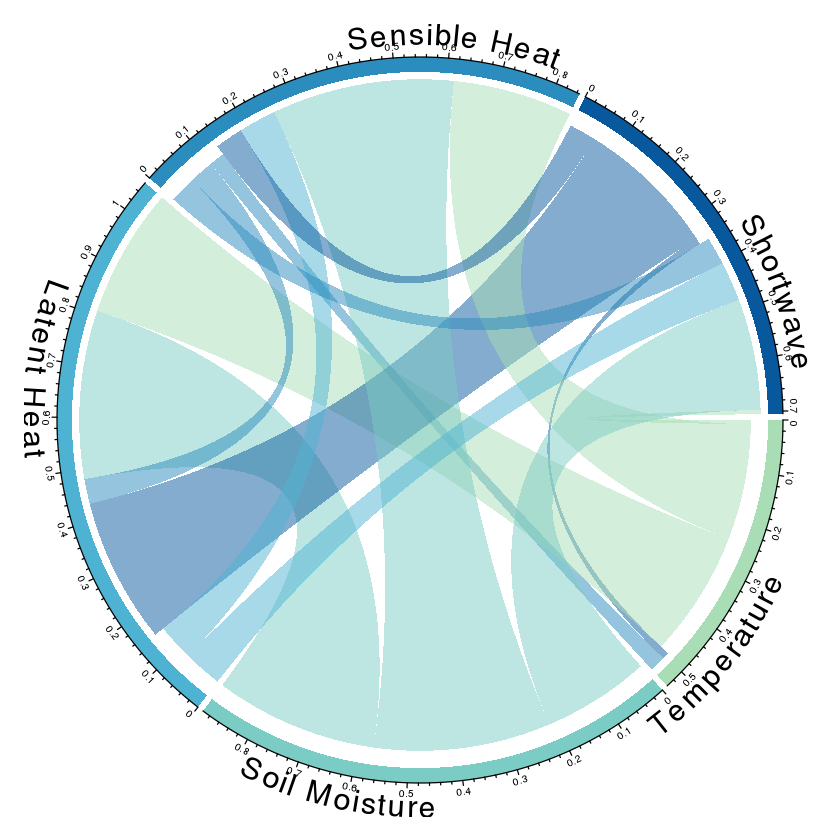

In [20]:
pos <- Amplero_diffs[[1]]
neg <- Amplero_diffs[[2]]
neg[is.na(neg)] <- 0
pos[is.na(pos)] <- 0
chordDiagram(neg + pos, directional=1, annotationTrack=c('grid','axis'), grid.col = colors2)
#for (si in get.all.sector.index()) {
#    xlim = get.cell.meta.data("xlim", sector.index = si, track.index = 1)
#    ylim = get.cell.meta.data("ylim", sector.index = si, track.index = 1)
#    circos.text(mean(xlim), mean(ylim), si, cex=1.4)
#}
circos.track(track.index = 1, panel.fun = function(x, y) {
   circos.text(CELL_META$xcenter, CELL_META$ylim[1], CELL_META$sector.index,
       facing = "bending.inside", niceFacing = TRUE, cex=1.5, adj = c(0, -1.2))
}, bg.border = NA) # here set bg.border to NA is important

Note: 11 points are out of plotting region in sector 'Temperature', track '1'.

Note: 13 points are out of plotting region in sector 'Soil Moisture', track '1'.

Note: 11 points are out of plotting region in sector 'Latent Heat', track '1'.

Note: 13 points are out of plotting region in sector 'Sensible Heat', track '1'.

Note: 9 points are out of plotting region in sector 'Shortwave', track '1'.



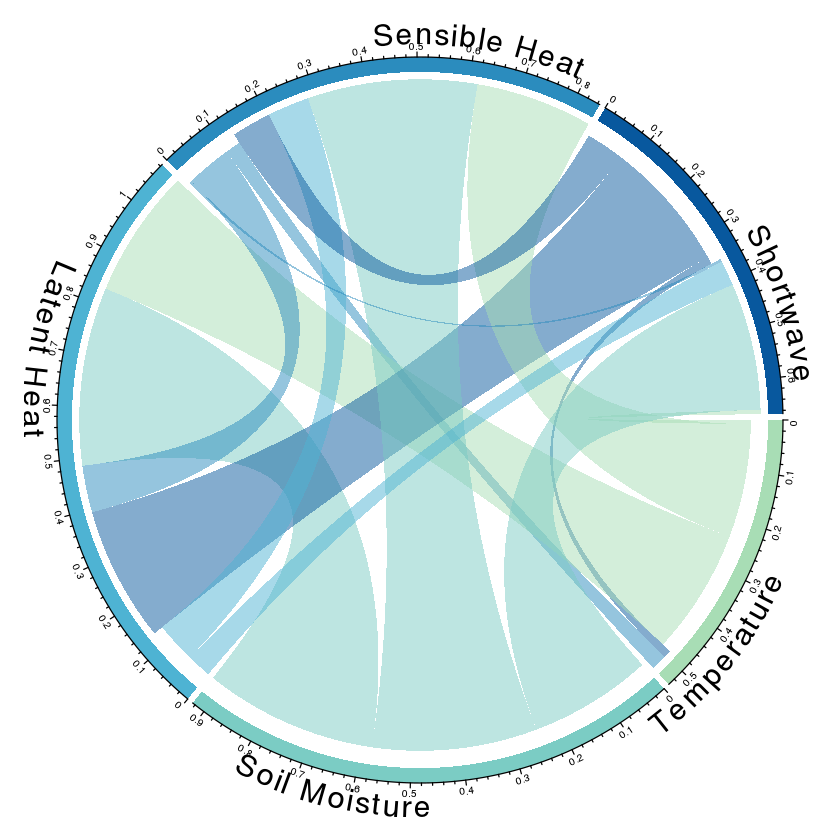

In [21]:
Amplero_diffs2 <- data_diff('/pool0/data/andrbenn/PLUMBER_data/data/Amplero_obs_0_10.csv', 
                          './data/Amplero_output_difTrans_logBelowCanopy_BallBerry.csv', remove_diag=TRUE)
pos2 <- Amplero_diffs2[[1]]
neg2 <- Amplero_diffs2[[2]]
neg2[is.na(neg2)] <- 0
pos2[is.na(pos2)] <- 0
chordDiagram(neg2 + pos2, directional=1, annotationTrack=c('grid','axis'), grid.col = colors2)
#for (si in get.all.sector.index()) {
#    xlim = get.cell.meta.data("xlim", sector.index = si, track.index = 1)
#    ylim = get.cell.meta.data("ylim", sector.index = si, track.index = 1)
#    circos.text(mean(xlim), mean(ylim), si, cex=1.4)
#}
circos.track(track.index = 1, panel.fun = function(x, y) {
   circos.text(CELL_META$xcenter, CELL_META$ylim[1], CELL_META$sector.index,
       facing = "bending.inside", niceFacing = TRUE, cex=1.5, adj = c(0, -1.2))
}, bg.border = NA) # here set bg.border to NA is important

Note: 11 points are out of plotting region in sector 'Temperature', track '1'.

Note: 13 points are out of plotting region in sector 'Soil Moisture', track '1'.

Note: 11 points are out of plotting region in sector 'Latent Heat', track '1'.

Note: 13 points are out of plotting region in sector 'Sensible Heat', track '1'.

Note: 9 points are out of plotting region in sector 'Shortwave', track '1'.



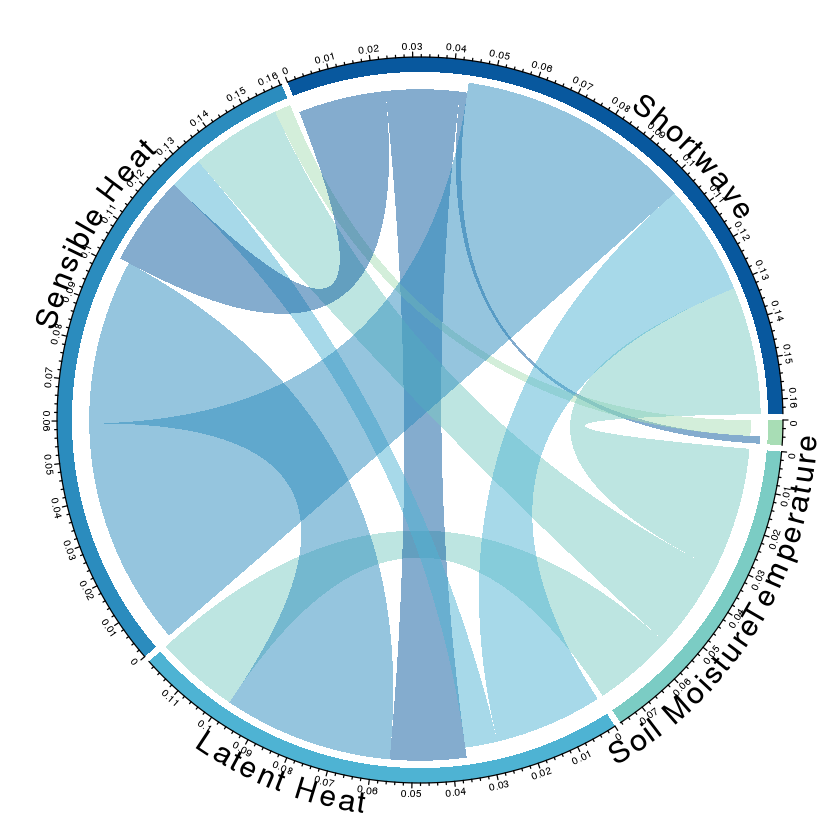

In [22]:
Amplero_diffs3 <- data_diff('./data/Amplero_output_simplExp_logBelowCanopy_BallBerry.csv', 
                          './data/Amplero_output_difTrans_logBelowCanopy_BallBerry.csv', remove_diag=TRUE)
pos3 <- Amplero_diffs3[[1]]
neg3 <- Amplero_diffs3[[2]]
neg3[is.na(neg3)] <- 0
pos3[is.na(pos3)] <- 0
chordDiagram(neg3 + pos3, directional=1, annotationTrack=c('grid','axis'), grid.col = colors2)
#for (si in get.all.sector.index()) {
#    xlim = get.cell.meta.data("xlim", sector.index = si, track.index = 1)
#    ylim = get.cell.meta.data("ylim", sector.index = si, track.index = 1)
#    circos.text(mean(xlim), mean(ylim), si, cex=1.4)
#}
circos.track(track.index = 1, panel.fun = function(x, y) {
   circos.text(CELL_META$xcenter, CELL_META$ylim[1], CELL_META$sector.index,
       facing = "bending.inside", niceFacing = TRUE, cex=1.5, adj = c(0, -1.2))
}, bg.border = NA) # here set bg.border to NA is important